# Aquiring data

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

url_caracteristics = '/kaggle/input/excelcara/caracteristics.xlsx'
url_places = '/kaggle/input/accidents-in-france-from-2005-to-2016/places.csv'
url_users = '/kaggle/input/accidents-in-france-from-2005-to-2016/users.csv'

df_caracteristics = pd.read_excel(url_caracteristics)
df_places = pd.read_csv(url_places)
df_users = pd.read_csv(url_users)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Analyzing User Dataframe

##### Base Dataframe

In [4]:
df_users.head(5)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


##### We only need to take a single feature from this dataframe, that is "grav" (i.e. the severity of the accident).
##### That said, we drop all the other columns (except "Num_Acc", because we'll use it as key)

In [5]:
df_users_dropped = df_users[['Num_Acc', 'grav']]

del df_users

df_users_dropped.head(5)

,Num_Acc,grav
0,201600000001,1
1,201600000001,3
2,201600000002,3
3,201600000002,3
4,201600000002,3


##### Since we are interested in the severity of the accident and not in that of each person involved, we are going to merge rows based on "Num_Acc" value.
##### The "grav" value for each row will be the highest among all persons involved.

In [6]:
users_aggregation_functions = {'grav': 'max'}
df_users_dropped = df_users_dropped.groupby(df_users_dropped['Num_Acc'], as_index=False).aggregate(users_aggregation_functions)

df_users_dropped.head(5)

,Num_Acc,grav
0,200500000001,4
1,200500000002,3
2,200500000003,3
3,200500000004,4
4,200500000005,4


##### Finally, let's look at our dataframe's shape

In [7]:
df_users_dropped.shape

(839985, 2)

In [8]:
df_users_dropped['grav'].unique()

array([4, 3, 2])

### Analyzing Places Dataframe

##### Base Dataframe

In [9]:
df_places.head(5)

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


##### We are going to take only some features:
###### 1. "catr" - category of the road
###### 2. "circ" - traffic regime
###### 3. "surf" - surface conditions

In [10]:
df_places_dropped = df_places[['Num_Acc', 'catr', 'circ', 'surf']]

del df_places

df_places_dropped.head(5)

,Num_Acc,catr,circ,surf
0,201600000001,3.0,2.0,1.0
1,201600000002,3.0,1.0,1.0
2,201600000003,3.0,2.0,2.0
3,201600000004,4.0,2.0,1.0
4,201600000005,4.0,0.0,1.0


##### Finally, let's look at our dataframe's shape

In [11]:
df_places_dropped.shape

(839985, 4)

# Analyzing Caracteristics Dataframe

##### Base Dataframe

In [12]:
df_caracteristics.head(5)

,"Num_Acc,""an"",""mois"",""jour"",""hrmn"",""lum"",""agg"",""int"",""atm"",""col"",""com"",""adr"",""gps"",""lat"",""long"",""dep""",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,"201600000001,16,2,1,1445,1,2,1,8,3,5,""46, rue ...",NaN,NaN,NaN,NaN,NaN
1,"201600000002,16,3,16,1800,1,2,6,1,6,5,""1a rue ...",NaN,NaN,NaN,NaN,NaN
2,"201600000003,16,7,13,1900,1,1,1,1,6,11,"""",""M"",...",NaN,NaN,NaN,NaN,NaN
3,"201600000004,16,8,15,1930,2,2,1,7,3,477,""52 ru...",NaN,NaN,NaN,NaN,NaN
4,"201600000005,16,12,23,1100,1,2,3,1,3,11,""rue J...",NaN,NaN,NaN,NaN,NaN


##### The Dataframe seems to be bad structured (there were missing/corrupted values in the csv file).
##### We have to rebuild the dataframe.

In [13]:
num_acc_list = []
an_list = []
mois_list = []
jour_list = []
hrmn_list = []
lum_list = []
agg_list = []
int_list = []
atm_list = []
col_list = []
com_list = []
adr_list = []
gps_list = []
lat_list = []
long_list = []
dep_list = []

for v in df_caracteristics['Num_Acc,"an","mois","jour","hrmn","lum","agg","int","atm","col","com","adr","gps","lat","long","dep"']:
    result = [x.strip() for x in v.split(',')]
    if len(result) == 16:
        num_acc_list.append(result[0])
        an_list.append(result[1])
        mois_list.append(result[2])
        jour_list.append(result[3])
        hrmn_list.append(result[4])
        lum_list.append(result[5])
        agg_list.append(result[6])
        int_list.append(result[7])
        atm_list.append(result[8])
        col_list.append(result[9])
        com_list.append(result[10])
        adr_list.append(result[11])
        gps_list.append(result[12])
        lat_list.append(result[13])
        long_list.append(result[14])
        dep_list.append(result[15])
    else:
        num_acc_list.append(result[0])
        an_list.append(np.nan)
        mois_list.append(np.nan)
        jour_list.append(np.nan)
        hrmn_list.append(np.nan)
        lum_list.append(np.nan)
        agg_list.append(np.nan)
        int_list.append(np.nan)
        atm_list.append(np.nan)
        col_list.append(np.nan)
        com_list.append(np.nan)
        adr_list.append(np.nan)
        gps_list.append(np.nan)
        lat_list.append(np.nan)
        long_list.append(np.nan)
        dep_list.append(np.nan)
    
    

cara_data = {'Num_Acc': num_acc_list,
             'an': an_list,
             'mois': mois_list,
             'jour': jour_list,
             'hrmn': hrmn_list,
             'lum': lum_list,
             'agg': agg_list,
             'int': int_list,
             'atm': atm_list,
             'col': col_list,
             'com': com_list,
             'adr': adr_list,
             'gps': gps_list,
             'lat': lat_list,
             'long': long_list,
             'dep': dep_list
}

df_caracteristics_adjusted = pd.DataFrame(data = cara_data)

del df_caracteristics

df_caracteristics_adjusted.head(5)

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201600000002,16,3,16,1800,1,2,6,1,6,5,"""1a rue du cimetière""","""M""",0,"""0""",590
2,201600000003,16,7,13,1900,1,1,1,1,6,11,"""""","""M""",0,"""0""",590
3,201600000004,16,8,15,1930,2,2,1,7,3,477,"""52 rue victor hugo""","""M""",0,"""0""",590
4,201600000005,16,12,23,1100,1,2,3,1,3,11,"""rue Joliot curie""","""M""",0,"""0""",590


##### We are going to take only some features:
###### 1. "lum" - lighting conditions in which the accident occurred
###### 2. "int" - type of intersection
###### 3. "atm" - atmospheric conditions

In [14]:
df_caracteristics_dropped = df_caracteristics_adjusted[['Num_Acc', 'lum', 'int', 'atm']]

del df_caracteristics_adjusted

df_caracteristics_dropped.head(5)

,Num_Acc,lum,int,atm
0,201600000001,NaN,NaN,NaN
1,201600000002,1,6,1
2,201600000003,1,1,1
3,201600000004,2,1,7
4,201600000005,1,3,1


##### Finally, let's look at our dataframe's shape

In [15]:
df_caracteristics_dropped.shape

(839985, 4)

# Creating the final Dataframe

##### First of all, we are going to merge the three dataframe previously created into a single dataframe.

In [16]:
df_users_dropped['Num_Acc'] = pd.to_numeric(df_users_dropped['Num_Acc'])
df_caracteristics_dropped['Num_Acc'] = pd.to_numeric(df_caracteristics_dropped['Num_Acc'])
df_places_dropped['Num_Acc'] = pd.to_numeric(df_places_dropped['Num_Acc'])

df_joined = df_users_dropped.join(df_caracteristics_dropped.set_index('Num_Acc'), on='Num_Acc')
df_joined = df_joined.join(df_places_dropped.set_index('Num_Acc'), on='Num_Acc')

del df_users_dropped
del df_caracteristics_dropped
del df_places_dropped

df_joined

,Num_Acc,grav,lum,int,atm,catr,circ,surf
0,200500000001,4,3,1,1,3.0,2.0,1.0
1,200500000002,3,1,1,1,2.0,0.0,1.0
2,200500000003,3,3,1,2,2.0,0.0,2.0
3,200500000004,4,1,1,1,3.0,2.0,1.0
4,200500000005,4,3,1,3,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...
839980,201600059428,4,1,1,1,3.0,2.0,1.0
839981,201600059429,4,1,1,1,2.0,2.0,1.0
839982,201600059430,4,1,1,1,2.0,2.0,0.0
839983,201600059431,4,1,3,1,2.0,2.0,1.0


##### Now let's check the values for each feature

In [17]:
df_joined['grav'].unique()

array([4, 3, 2])

In [18]:
df_joined['lum'].unique()

array(['3', '1', '5', '4', '2', nan], dtype=object)

In [19]:
df_joined['int'].unique()

array(['1', '2', '9', '0', '6', '8', '3', '4', nan, '7', '5'],
      dtype=object)

In [20]:
df_joined['atm'].unique()

array(['1', '2', '3', '8', '9', '7', '6', '4', '5', nan, 'NA'],
      dtype=object)

In [21]:
df_joined['catr'].unique()

array([ 3.,  2.,  4.,  6.,  9.,  5.,  1., nan])

In [22]:
df_joined['circ'].unique()

array([ 2.,  0.,  3.,  4.,  1., nan])

In [23]:
df_joined['surf'].unique()

array([ 1.,  2.,  0.,  9.,  7.,  8.,  5.,  6.,  3.,  4., nan])

##### As we can see, there are NaN values inside the Dataframe.
##### Since we don't want to introduce any kind of bias, we are going to drop each row containing NaN values.

In [24]:
df_joined = df_joined.drop(df_joined[pd.to_numeric(df_joined['lum'], errors='coerce').isnull()].index)
df_joined = df_joined.drop(df_joined[pd.to_numeric(df_joined['int'], errors='coerce').isnull()].index)
df_joined = df_joined.drop(df_joined[pd.to_numeric(df_joined['atm'], errors='coerce').isnull()].index)
df_joined = df_joined.drop(df_joined[df_joined['atm'] == 'NA'].index)
df_joined = df_joined.drop(df_joined[pd.to_numeric(df_joined['catr'], errors='coerce').isnull()].index)
df_joined = df_joined.drop(df_joined[pd.to_numeric(df_joined['circ'], errors='coerce').isnull()].index)
df_joined = df_joined.drop(df_joined[pd.to_numeric(df_joined['surf'], errors='coerce').isnull()].index)

df_joined.reset_index(drop=True)

df_joined.head(5)

,Num_Acc,grav,lum,int,atm,catr,circ,surf
0,200500000001,4,3,1,1,3.0,2.0,1.0
1,200500000002,3,1,1,1,2.0,0.0,1.0
2,200500000003,3,3,1,2,2.0,0.0,2.0
3,200500000004,4,1,1,1,3.0,2.0,1.0
4,200500000005,4,3,1,3,3.0,2.0,2.0


##### Let's look at the shape of the Dataframe.

In [25]:
df_joined.shape

(524263, 8)

##### Finally, we convert the object-type column to numeric-type

In [26]:
df_joined['lum'] = pd.to_numeric(df_joined['lum'])

In [27]:
df_joined['int'] = pd.to_numeric(df_joined['int'])

In [28]:
df_joined['atm'] = pd.to_numeric(df_joined['atm'])

# Data Exploration and Analysis

##### We try to get some information about the relationship between the severity of the accident and the other features.
### 1.  First step: building the correlation matrix.

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [30]:
df_joined[['grav', 'lum', 'int', 'atm', 'catr', 'circ', 'surf']].corr()

,grav,lum,int,atm,catr,circ,surf
grav,1.000000,0.001029,0.065759,-0.039593,0.011064,-0.026858,-0.017306
lum,0.001029,1.000000,0.022535,0.032918,0.020917,0.002676,0.048283
int,0.065759,0.022535,1.000000,-0.012091,0.139949,-0.092048,-0.030636
atm,-0.039593,0.032918,-0.012091,1.000000,-0.026467,0.021123,0.287098
catr,0.011064,0.020917,0.139949,-0.026467,1.000000,-0.247346,-0.019643
circ,-0.026858,0.002676,-0.092048,0.021123,-0.247346,1.000000,0.024501
surf,-0.017306,0.048283,-0.030636,0.287098,-0.019643,0.024501,1.000000


##### As expected, there's no correlation between the severity and each single feature.
### 2. Second Step: showing severity distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe15ebe8d10>]],
      dtype=object)

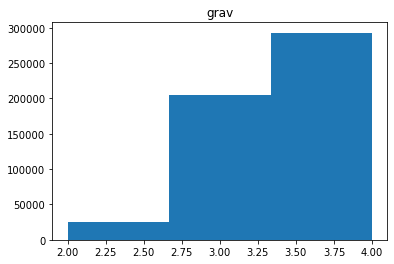

In [31]:
df_joined.hist(column='grav', bins=3, grid=False)

### 3. Third Step: showing attributes value distribution (based on severity)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe15ebac7d0>,
      dtype=object)

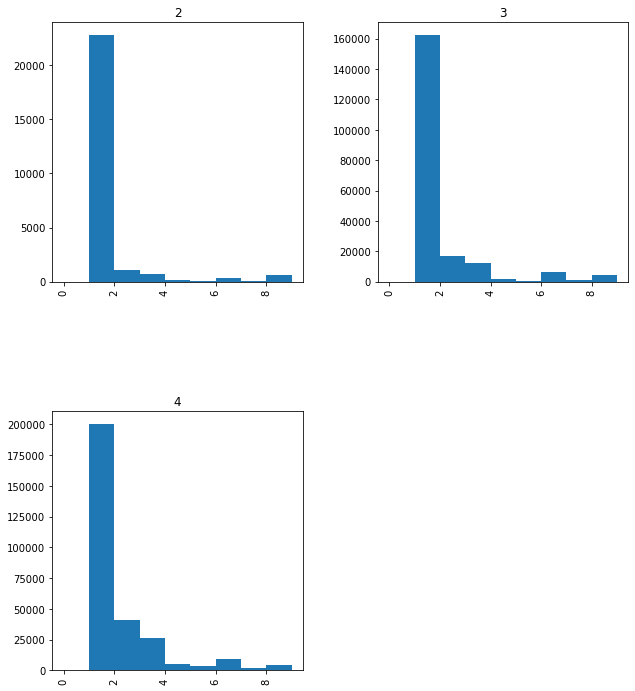

In [32]:
df_joined.hist(column='int', grid=False, by='grav', figsize=(10,12), bins=9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe15e9e3390>,
      dtype=object)

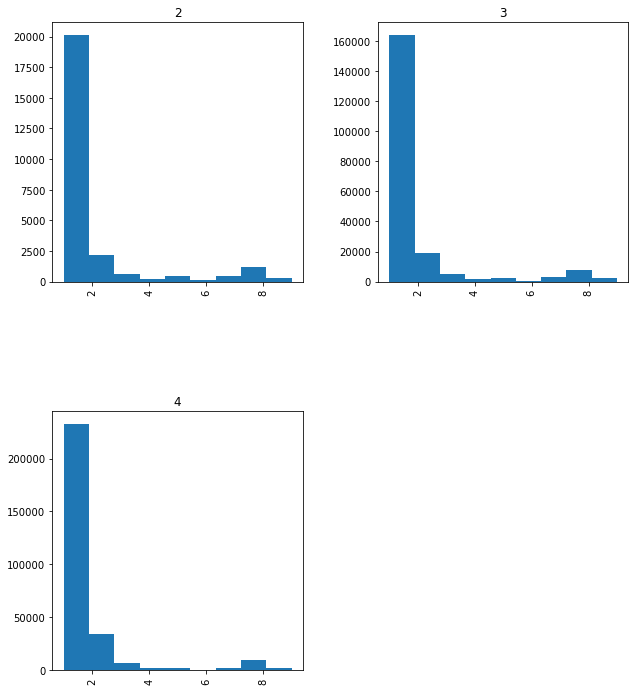

In [33]:
df_joined.hist(column='atm', grid=False, by='grav', figsize=(10,12), bins=9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe15e7e1610>,
      dtype=object)

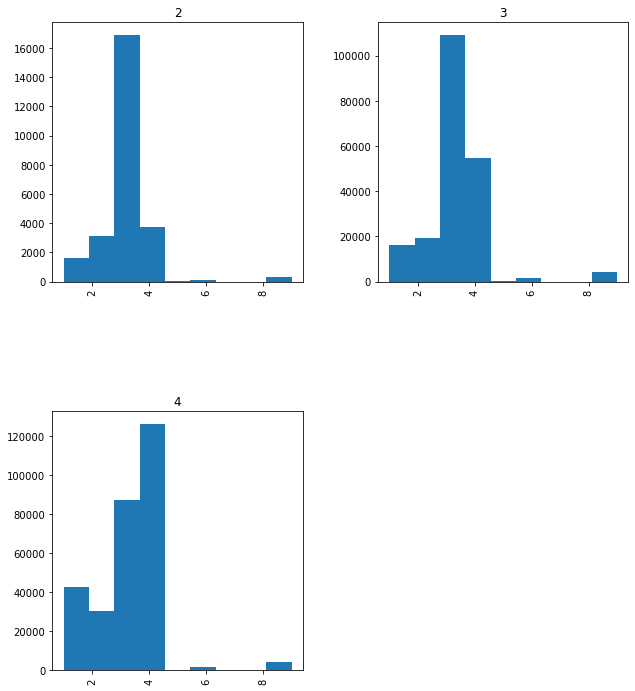

In [34]:
df_joined.hist(column='catr', grid=False, by='grav', figsize=(10,12), bins=9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1dc319710>,
      dtype=object)

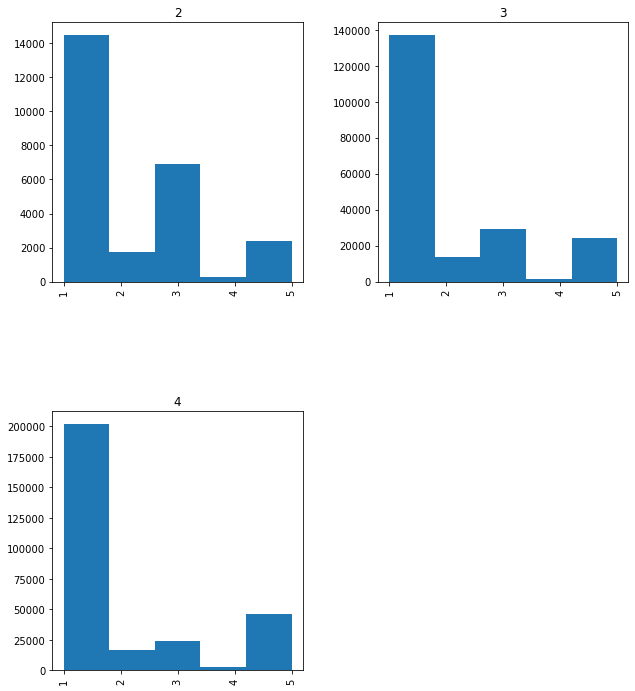

In [35]:
df_joined.hist(column='lum', grid=False, by='grav', figsize=(10,12), bins=5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe19f101a90>,
      dtype=object)

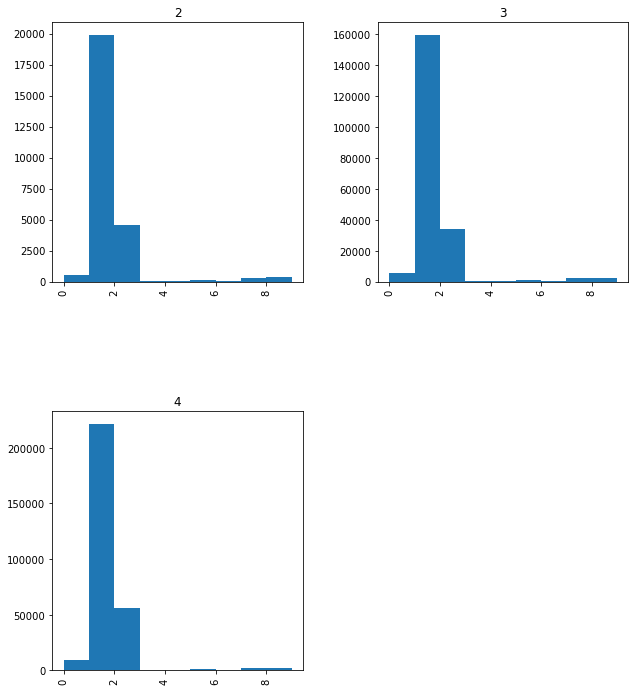

In [36]:
df_joined.hist(column='surf', grid=False, by='grav', figsize=(10,12), bins=9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1a222c7d0>,
      dtype=object)

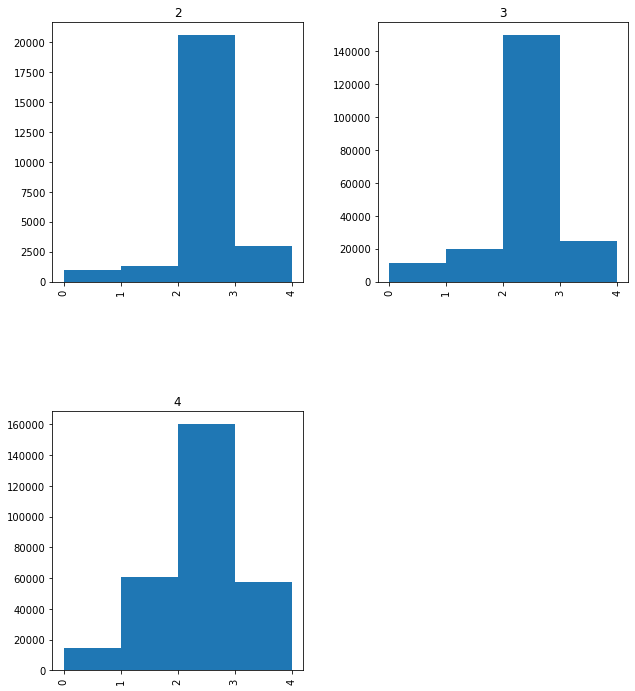

In [37]:
df_joined.hist(column='circ', grid=False, by='grav', figsize=(10,12), bins=4)

#### By simply looking at the graphs we can get some good insights about the features:
* ##### "int" attribute (type of intersection) is not significantly varying as severity increases. The value of "1" for the attribute (i.e. "No intersection") is dominant and we can see that while severity increases this value becomes even more dominant (remember that severity increases while its value decreases, i.e. 2=Death, 3=Serious Injoury, 4=Light Injoury).
* ##### "atm" attribute (atmospheric conditions) is even less significantly varying with severity than the previous one. The value of "1" is always dominant and the other values doesn't change to much.
* ##### "catr" attribute (category of the road) is showing a great variation compared to the other attributes. The histograms show that accidents with light injuries are distributed uniformly along the main categories, while more serious accidents happens mostly on roads of category "3" (Departmental).
* ##### "lum" attribute (lighting conditions) beahviour is similar to "int" one, but in this case the value of "1" becomes less dominant while severity level increses.
* ##### "surf" attribute (surface condition) seems totally useless in terms of information gain: its distribution doesn't change at different values of severity.
* ##### "circ" attribute (traffic regime) behaviour is exactly the same as that of "int" attribute.

### 4. Fourth Step: cleaning not-significant attributes from the final dataframe
##### We are going to create a new dataframe for the modeling phase: the only action we take is dropping the "surf" attribute (considered useless for the analysis) and the "Num_Acc" attribute (we clearly don't need it).

In [38]:
df = df_joined[['grav', 'lum', 'int', 'atm', 'catr', 'circ']]

del df_joined

df.head(5)

,grav,lum,int,atm,catr,circ
0,4,3,1,1,3.0,2.0
1,3,1,1,1,2.0,0.0
2,3,3,1,2,2.0,0.0
3,4,1,1,1,3.0,2.0
4,4,3,1,3,3.0,2.0


# Data Preparation

##### We are going to take some preprocessing actions before going to build our model. Moreover, we will build three model using different Machine Learning techniques and test their efficiency and accuracy in predicting severity.

### 1. First Step: Features and Label setting

In [39]:
X = df[['lum', 'int', 'atm', 'catr', 'circ']] .values
y = df[['grav']].values

### 2. Second Step: Data Standardization

In [40]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.78405001, -0.43641252, -0.36445199, -0.11453558,  0.12321864],
       [-0.60898263, -0.43641252, -0.36445199, -0.91853596, -2.62456297],
       [ 0.78405001, -0.43641252,  0.23094823, -0.91853596, -2.62456297],
       [-0.60898263, -0.43641252, -0.36445199, -0.11453558,  0.12321864],
       [ 0.78405001, -0.43641252,  0.82634845, -0.11453558,  0.12321864]])

### 3. Third Step: Splitting data into test and train subsets

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print ('Train set dimension:', X_train.shape,  y_train.shape)
print ('Test set dimension:', X_test.shape,  y_test.shape)

Train set dimension: (419410, 5) (419410, 1)
Test set dimension: (104853, 5) (104853, 1)


# Modeling

### 1. First model: KNN

##### We are going to find the best K (the one that maximizes accuracy)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [45]:
k = 16

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat_KNN = neigh.predict(X_test)

KNN_train_acc = metrics.accuracy_score(y_train, neigh.predict(X_train))
KNN_test_acc = metrics.accuracy_score(y_test, yhat_KNN)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


##### NB: More Ks were tested but in the final Notebook we removed lower and higher value of K (because of memory limits)

##### The selected value is therefore K=16 (max accuracy value).

### 2. Second model: Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree = DecisionTreeClassifier(criterion="entropy")#, max_depth = 4)

tree.fit(X_train,y_train)

predTree = tree.predict(X_test)

print (predTree [0:5])
print (y_test [0:5])

[4 4 3 4 4]
[[3]
 [4]
 [2]
 [4]
 [4]]


In [48]:
DT_acc = metrics.accuracy_score(y_test, predTree)

print("DecisionTrees's Accuracy: ", DT_acc)

DecisionTrees's Accuracy:  0.6216417269892135


### 3. Third model: Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logistic_reg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

y_hat_log = logistic_reg.predict(X_test)

LR_acc = metrics.accuracy_score(y_test, y_hat_log)

print("Accuracy: ", LR_acc)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy:  0.5598123086606964


### 4. Fourth model: Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rndf_model = RandomForestClassifier(max_depth=12)

rndf_model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=12, random_state=0)

In [105]:
yhat_rndf = rndf_model.predict(X_test)

In [106]:
rndf_acc = metrics.accuracy_score(y_test, yhat_rndf)

print("Accuracy: ", rndf_acc)

Accuracy:  0.6228147978598609


##### NB: More max_depth values were tested but in the final Notebook we removed lower and higher values of max_depth (because of memory limits)

##### The selected value is therefore 12 (max accuracy value).

# Evaluation

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

### KNN metrics

In [91]:
# Jaccard index
j_knn = jaccard_score(y_test, yhat_KNN, average='weighted')

# F1 score
f1_knn = f1_score(y_test, yhat_KNN, average='weighted') 

# Recall
recall_knn = recall_score(y_test, yhat_KNN,average='weighted')

# Precision
prec_knn = precision_score(y_test, yhat_KNN, average='weighted')

print(str(j_knn) + '\n' + str(f1_knn) + '\n' + str(recall_knn) + '\n' + str(prec_knn))

0.4210768109376853
0.5808557886605696
0.5933545058319742
0.5801142692106334


### Decision Tree metrics

In [92]:
# Jaccard index
j_tree = jaccard_score(y_test, predTree, average='weighted')

# F1 score
f1_tree = f1_score(y_test, predTree, average='weighted') 

# Recall
recall_tree = recall_score(y_test, predTree,average='weighted')

# Precision
prec_tree = precision_score(y_test, predTree, average='weighted')

print(str(j_tree) + '\n' + str(f1_tree) + '\n' + str(recall_tree) + '\n' + str(prec_tree))

0.4455646147251086
0.6001438829417499
0.6216417269892135
0.5885769454802574


### Logistic Regression metrics

In [93]:
# Jaccard index
j_log = jaccard_score(y_test, y_hat_log, average='weighted')

# F1 score
f1_log = f1_score(y_test, y_hat_log, average='weighted') 

# Recall
recall_log = recall_score(y_test, y_hat_log,average='weighted')

# Precision
prec_log = precision_score(y_test, y_hat_log, average='weighted')

print(str(j_log) + '\n' + str(f1_log) + '\n' + str(recall_log) + '\n' + str(prec_log))

0.3141387486356884
0.4033879771037523
0.5598123086606964
0.4683312708081031


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest metrics

In [94]:
# Jaccard index
j_rndf = jaccard_score(y_test, yhat_rndf, average='weighted')

# F1 score
f1_rndf = f1_score(y_test, yhat_rndf, average='weighted') 

# Recall
recall_rndf = recall_score(y_test, yhat_rndf,average='weighted')

# Precision
prec_rndf = precision_score(y_test, yhat_rndf, average='weighted')

print(str(j_rndf) + '\n' + str(f1_rndf) + '\n' + str(recall_rndf) + '\n' + str(prec_rndf))

0.44626195374223604
0.600677428599505
0.6226240546288614
0.5956462486063212


### Metrics Dataframe

In [107]:
metrics_data = {'Jaccard index': [j_knn, j_tree, j_log, j_rndf],
                'F1 score': [f1_knn, f1_tree, f1_log, f1_rndf],
                'Recall': [recall_knn, recall_tree, recall_log, recall_rndf],
                'Precision': [prec_knn, prec_tree, prec_log, prec_rndf]
               }

metrics_df = pd.DataFrame(data = metrics_data, index = ['KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest'])

metrics_df

,Jaccard index,F1 score,Recall,Precision
KNN,0.421077,0.580856,0.593355,0.580114
Decision Tree,0.445565,0.600144,0.621642,0.588577
Logistic Regression,0.314139,0.403388,0.559812,0.468331
Random Forest,0.446262,0.600677,0.622624,0.595646
